# Testing

* **Products used:** 


### Background 

### Description


***

## Getting started


### Load packages
Load key Python packages and any supporting functions for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_absolute_error

### Analysis parameters


In [2]:
path = 'results/ndvi_ls8_s2.csv' 

In [6]:
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)

### 1:1 plots

In [10]:
x=df['NDVI_ls8'].values
y=df['NDVI_s2'].values

s, i, r, p, sd, = stats.linregress(x, y)
mae = mean_absolute_error(x,y)

linear eq: NDVI_S2 = 0.980*NDVI_LS8 + 0.011
MAE:  0.05




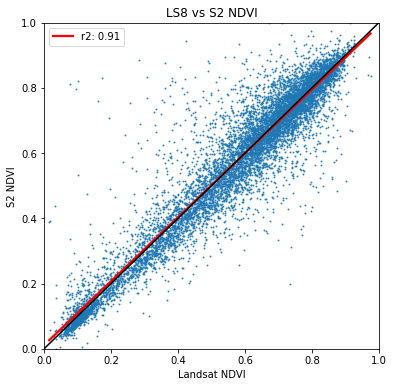

In [12]:
print(f'linear eq: NDVI_S2 = {s:.3f}*NDVI_LS8 + {i:.3f}')
print("MAE: ", round(mae, 2))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,3)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('Landsat NDVI')
ax.set_ylabel('S2 NDVI')
ax.set_title('LS8 vs S2 NDVI');